In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from upyog.all import *

Output()

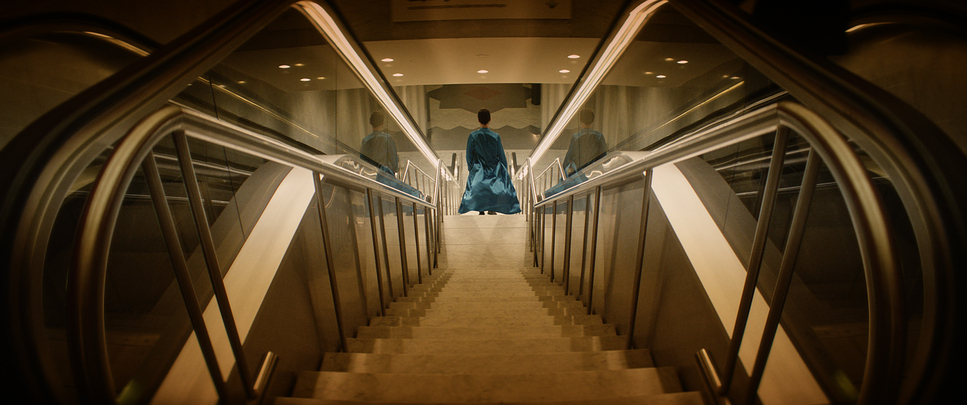

In [3]:
img_files = get_image_files("./assets")
imgs = [Image.open(i) for i in track(img_files)]
img = imgs[3]
img

In [4]:
from upyog.image.visualiser import *

In [5]:
viz = Visualiser(img, font_path="")
viz.size

(967, 405)

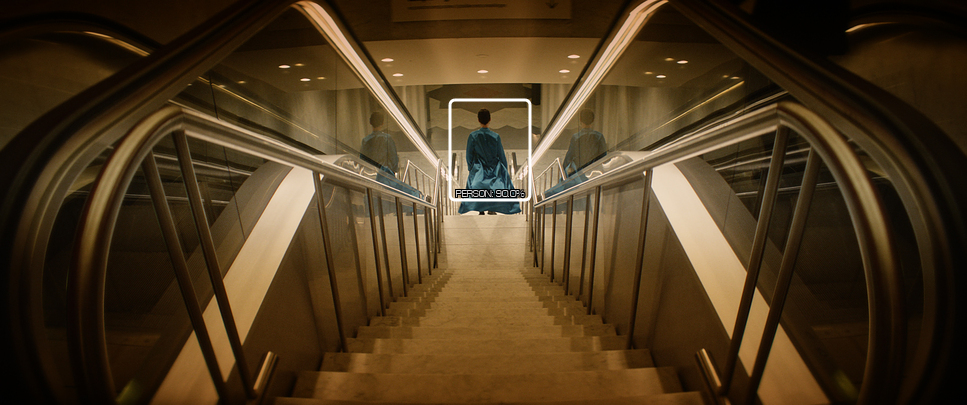

In [6]:
xyxy = (450, 100, 530, 200)
# xyxy = (0,0,900, 300)
viz.draw_bbox(xyxy, "Person", confidence=0.9, font_bordered=True)

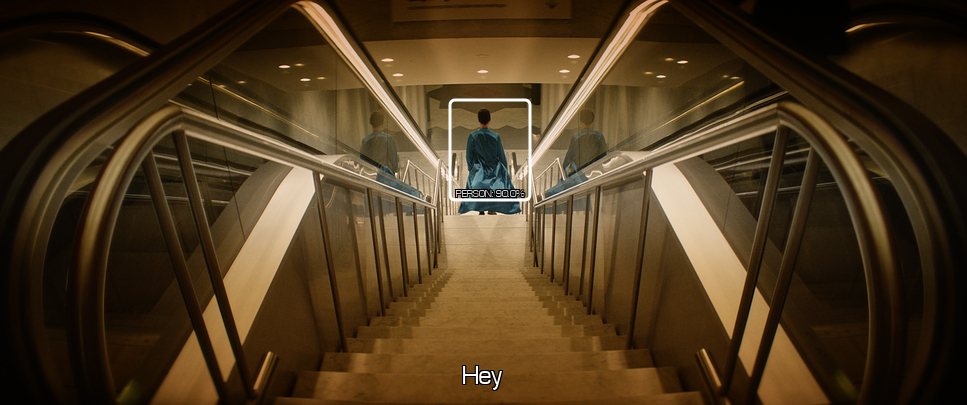

In [7]:
viz.caption("Hey")

### .

In [ ]:
%load_ext autoreload
%autoreload 2

In [16]:
from upyog.all import *

img_files = get_image_files("/Users/rahulsomani/datasets/Datasets/shot-composition/workspace-finetune/left/shot.framing/shot.framing.medium")
imgs = [Image.open(i) for i in track(img_files)]

imgs[0].size, imgs[1].size

Output()

((1920, 1080), (967, 411))

In [ ]:
imgs[2] | imgs[1] | imgs[0]

### Composition

In [8]:
from upyog.image import *

In [9]:
img = deepcopy(imgs[3])

In [10]:
left_heavy = [(0.5, 1.0)]
left_heavy_center = [(0.0, 0.25), (0.5, 1.0)]
left_heavy_typical = [(0.0, 0.05), (0.45, 1.0)]
left_heavy_extreme = [(0.25, 1.0)]

right_heavy = [(0.0, 0.5)]
right_heavy_center = [(0.0, 0.5), (0.75, 1.0)]
right_heavy_typical = [(0.0, 0.55), (0.95, 1.0)]
right_heavy_extreme = [(0.0, 0.75)]


In [ ]:
sep = Image.new("RGB", (10,2000), (255,255,255))
sep = sep.draw_vertical_bars([(0.0, 1.0)], fill=(0,0,0), opacity=0.25)

sep_H = sep
sep_V = sep.resize((5000, 10))

In [19]:
def get_left_heavy_grid(i: Image.Image, opacity=0.7, include_source=True):
    E = i.draw_vertical_bars(left_heavy_extreme, opacity=opacity)
    T = i.draw_vertical_bars(left_heavy_typical, opacity=opacity)
    C = i.draw_vertical_bars(left_heavy_center, opacity=opacity)
    
#     E = E.draw_text("Extreme Left Heavy", font_background=True)
#     T = T.draw_text("Typical Left Heavy", font_background=True)
#     C = C.draw_text("Center Left Heavy", font_background=True)
    left_collection = E | T | C

    if include_source:
        i = resize_with_padding(i, (left_collection.size))
        return i // left_collection
    else:
        return left_collection

def get_right_heavy_grid(i: Image.Image, opacity=0.7, include_source=True):
    E = i.draw_vertical_bars(right_heavy_extreme, opacity=opacity)
    T = i.draw_vertical_bars(right_heavy_typical, opacity=opacity)
    C = i.draw_vertical_bars(right_heavy_center, opacity=opacity)
    
#     E = E.draw_text("Extreme Right Heavy", font_background=True)
#     T = T.draw_text("Typical Right Heavy", font_background=True)
#     C = C.draw_text("Center Right Heavy", font_background=True)

    right_collection = E | sep_H | T | sep_H | C
    if include_source:
        i = resize_with_padding(i, (right_collection.size))
        return i // sep_V // right_collection
    else:
        return right_collection


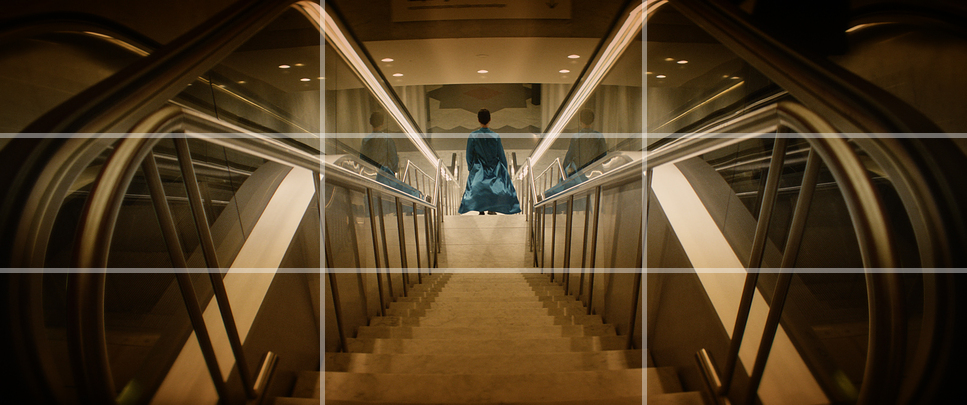

In [31]:
vis = Visualiser(img)
vis.draw_rule_of_thirds(5)

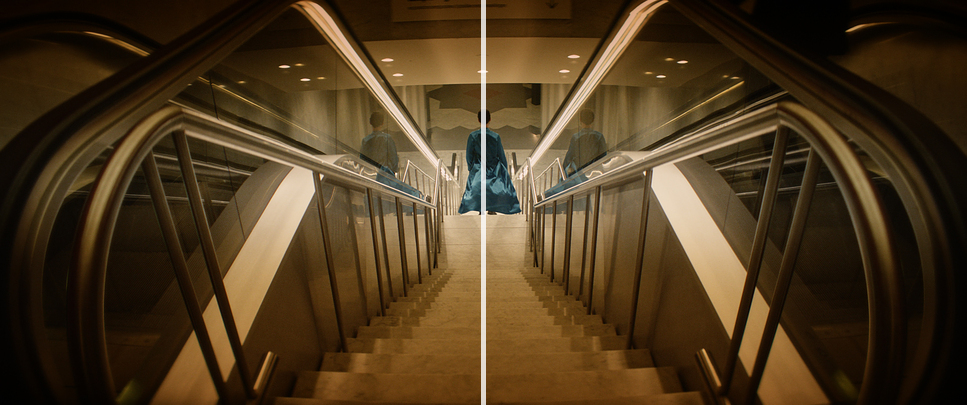

In [34]:
vis = Visualiser(img)
vis.draw_vertical_bars([0.5], opacity=0.8)

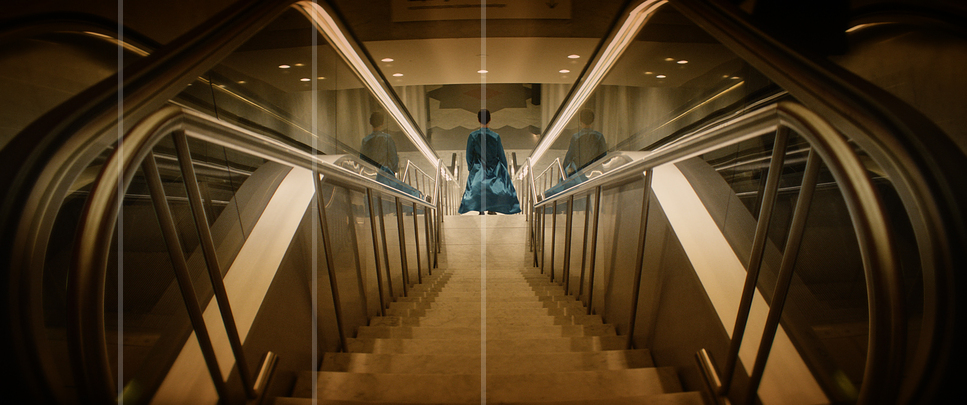

In [42]:
vis = Visualiser(img)
vis.draw_vertical_bars([.125, .325, 4/8], opacity=0.2)
vis.draw_rectangle()

In [ ]:
vis.draw_rectangle()

In [20]:
get_right_heavy_grid(Visualiser(img))

NameError: name 'sep_H' is not defined

In [ ]:
from IPython.display import display

for i in track(imgs[:100]):
    res = get_left_heavy_grid(i)
    display(res)

In [ ]:
i.draw_rule_of_thirds()

In [ ]:
img.draw_vertical_bars([(0.0, 0.5)])